 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [109]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [110]:
# Reading whale returns
csv_path=Path("whale_returns.csv")
whale_returns=pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.sort_index(inplace=True)
whale_returns



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [111]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [112]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()    

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [113]:
# Reading algorithmic returns
csv_path=Path("algo_returns.csv")
algo_returns=pd.read_csv(csv_path, index_col="Date", infer_datetime_format=True,parse_dates=True)
algo_returns.sort_index(inplace= True)

In [114]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [115]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [116]:
# Reading S&P 500 Closing Prices
csv_path=Path('sp500_history.csv')
sp500=pd.read_csv(csv_path,index_col="Date",infer_datetime_format=True,parse_dates=True)
sp500.sort_index(inplace=True)

In [117]:
# Check Data Types
sp500.dtypes



Close    object
dtype: object

In [118]:
# Fix Data Types

sp500['Close']=sp500['Close'].str.replace('$','')
sp500['Close']=sp500['Close'].astype('float')
sp500.dtypes

Close    float64
dtype: object

In [119]:
# Calculate Daily Returns
sp500_returns=sp500.pct_change()


In [120]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [121]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={"Close":'SP500 returns'},inplace=True)
sp500_returns.tail()


,SP500 returns
Date,
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579
2019-04-22,0.001012
2019-04-23,0.008841


## Combine Whale, Algorithmic, and S&P 500 Returns

In [122]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns=pd.concat([whale_returns,algo_returns,sp500_returns],axis='columns',join='inner')
combined_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

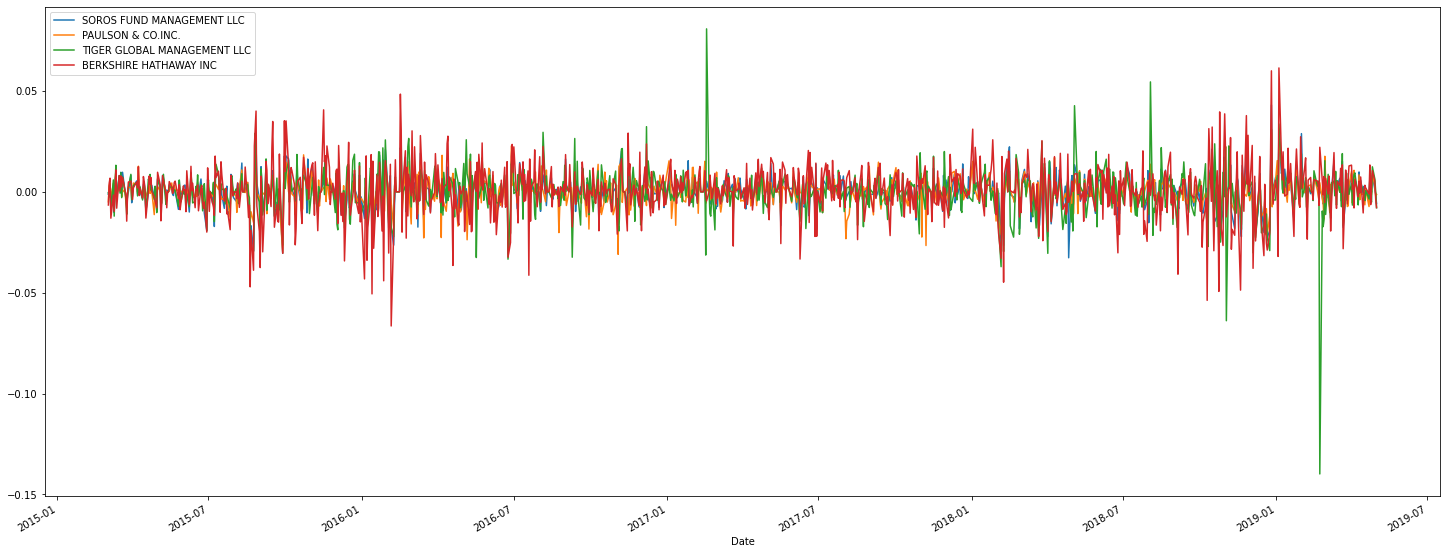

In [123]:
# Plot daily returns of all portfolios

whale_returns.plot(figsize=(25,10))


<AxesSubplot:xlabel='Date'>

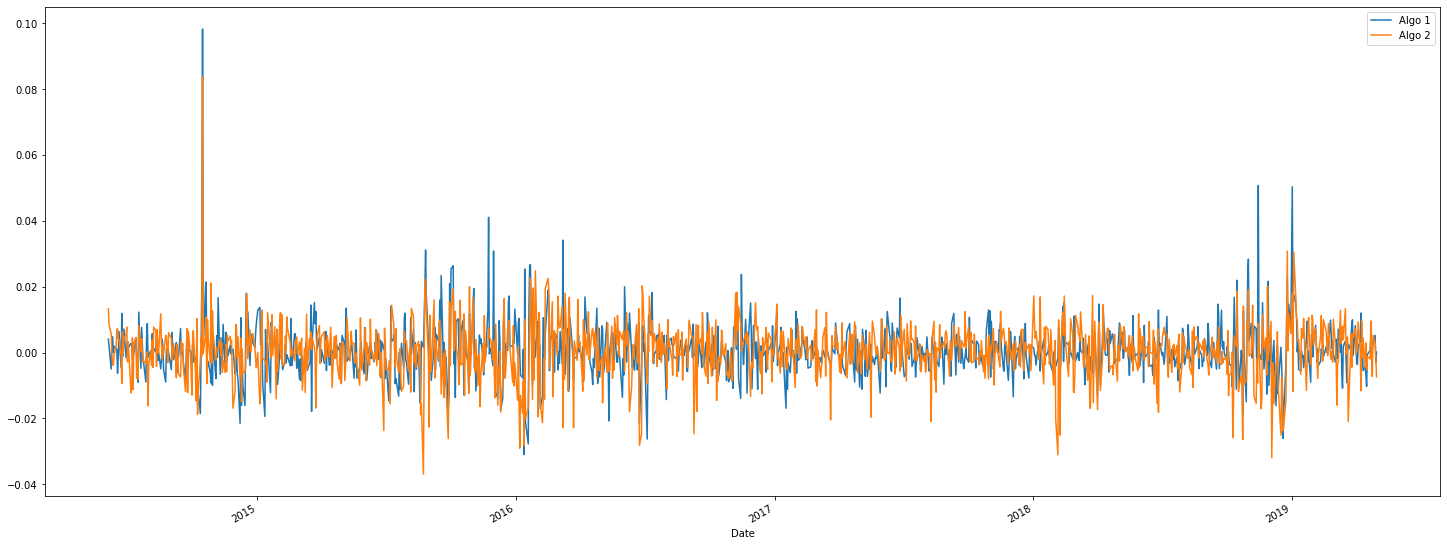

In [124]:
algo_returns.plot(figsize=(25,10))

<AxesSubplot:xlabel='Date'>

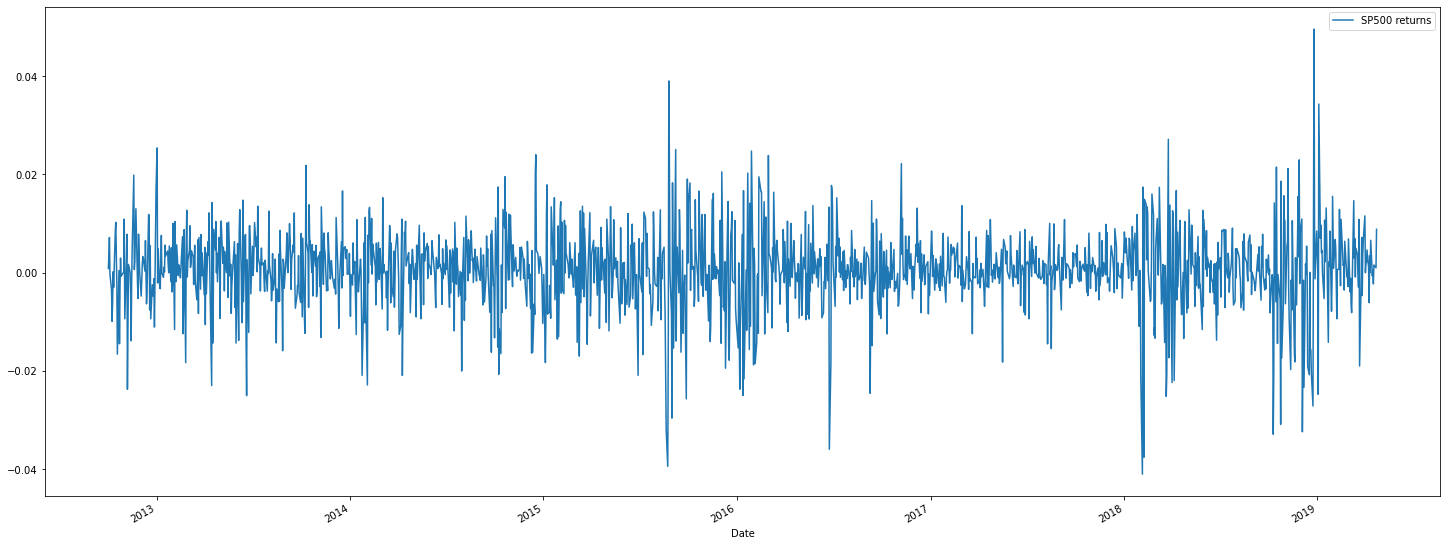

In [125]:
sp500_returns.plot(figsize=(25,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

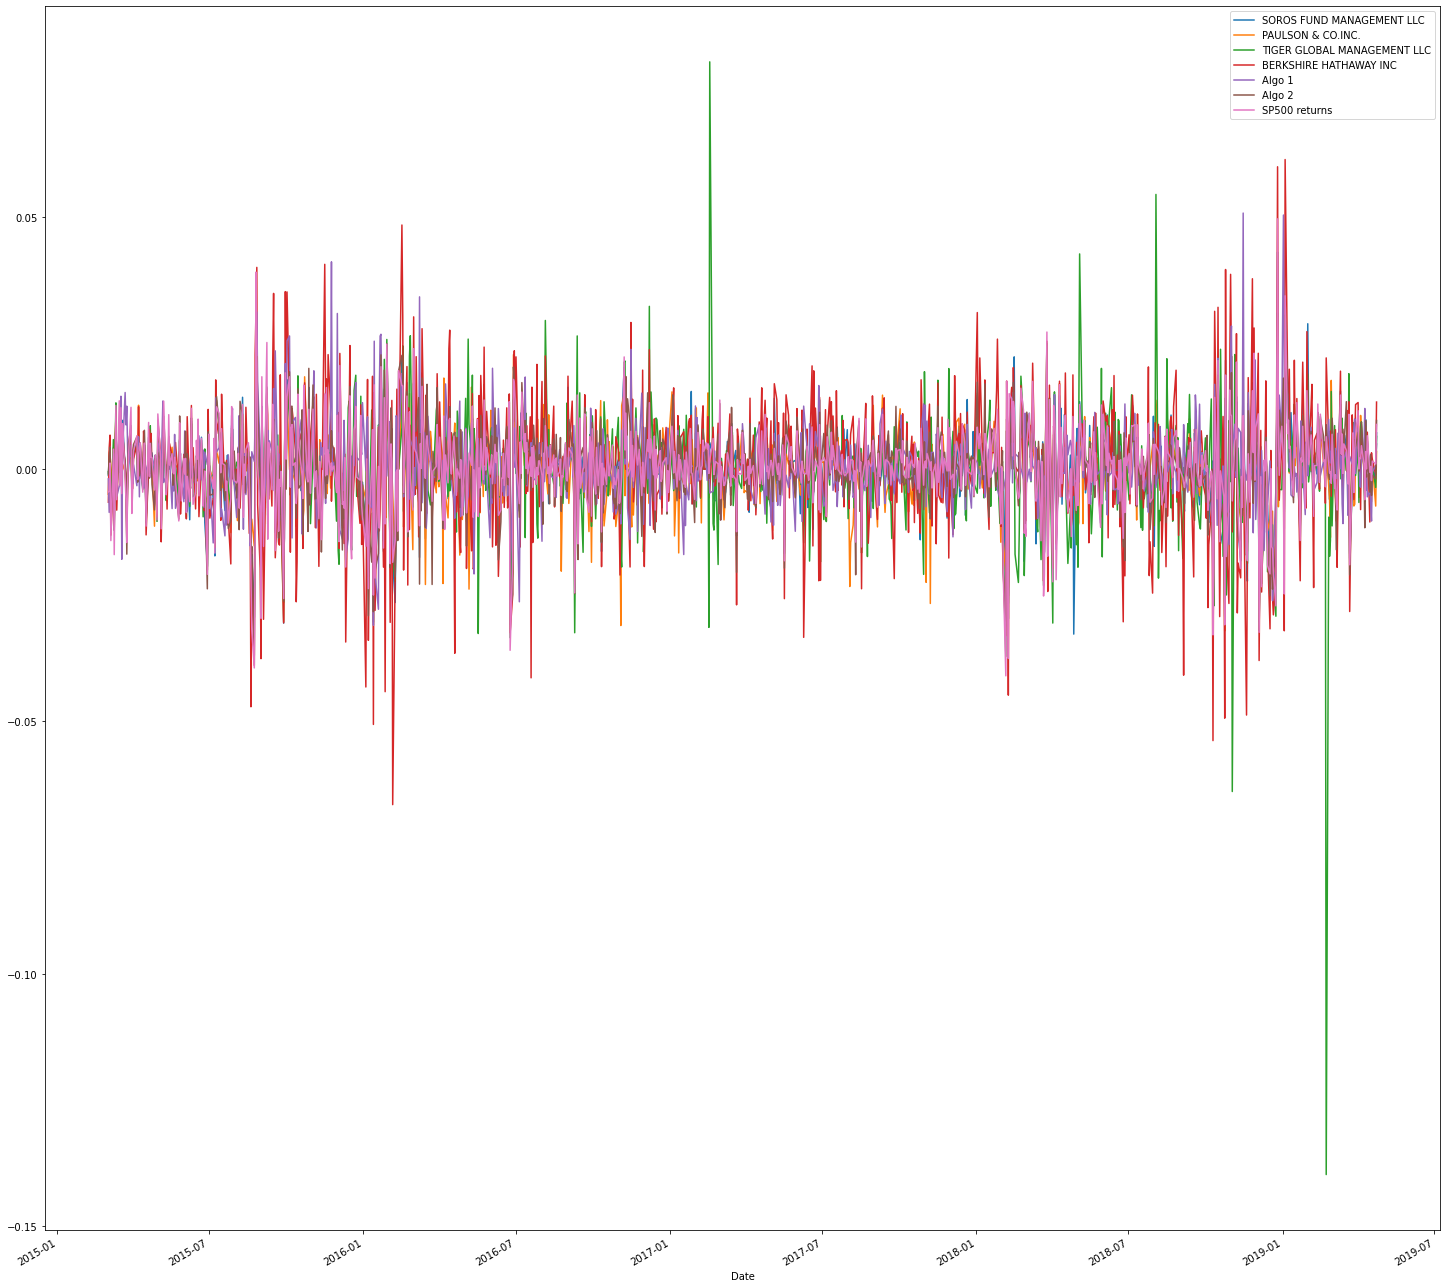

In [126]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
combined_returns.plot(kind='line',figsize=(25,25))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [127]:
# Box plot to visually show risk


In [128]:
combined_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 returns
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,0.000177,-0.000214,-0.000083,0.000506,0.000662,0.000263,0.000349
std,0.007895,0.007023,0.010894,0.012919,0.007620,0.008342,0.008554
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.040979
25%,-0.003638,-0.004042,-0.004790,-0.005634,-0.003252,-0.003794,-0.002881
50%,0.000518,0.000000,0.000320,0.000735,0.000069,0.000703,0.000419
75%,0.004328,0.003626,0.005285,0.007619,0.003908,0.005253,0.004471
max,0.042977,0.029338,0.080705,0.061341,0.050735,0.030822,0.049594


<AxesSubplot:>

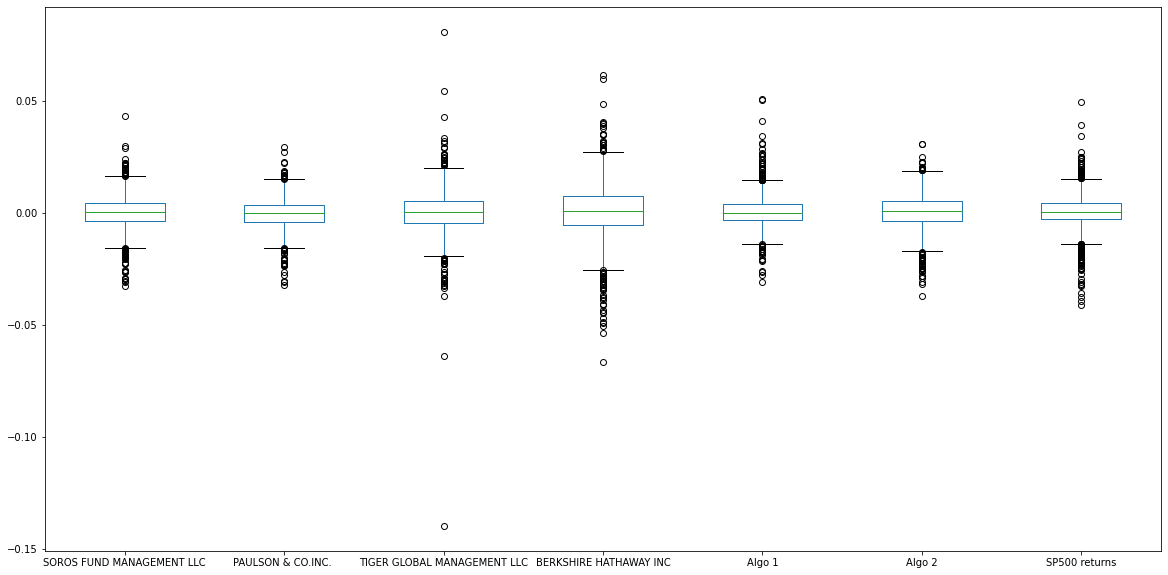

In [129]:
combined_returns.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [130]:
# Calculate the daily standard deviations of all portfolios
combined_std=combined_returns.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [131]:
# Calculate  the daily standard deviation of S&P 500
combined_std = combined_std.sort_values(ascending=False)
combined_std

# Determine which portfolios are riskier than the S&P 500


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500 returns                  0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [132]:
## BERKSHIRE HATHAWAY INC (std 0.012919) and Tiger Global Management (std 0.010894) are riskier than the S&P 500

### Calculate the Annualized Standard Deviation

In [133]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=combined_std*np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500 returns                  0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

In [134]:
sp_500_21day_std=combined_returns.loc[:,'SP500 returns'].rolling(window=21).std()
sp_500_21day_std

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.006498
2019-04-17    0.006537
2019-04-18    0.006470
2019-04-22    0.006094
2019-04-23    0.004325
Name: SP500 returns, Length: 1043, dtype: float64

In [135]:
sp_500_21day_std.dropna(inplace=True)
sp_500_21day_std


Date
2015-03-31    0.009105
2015-04-01    0.009095
2015-04-02    0.009114
2015-04-06    0.009246
2015-04-07    0.008707
                ...   
2019-04-16    0.006498
2019-04-17    0.006537
2019-04-18    0.006470
2019-04-22    0.006094
2019-04-23    0.004325
Name: SP500 returns, Length: 1023, dtype: float64

<AxesSubplot:xlabel='Date'>

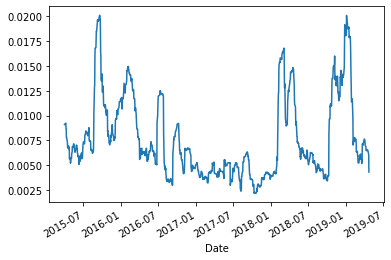

In [136]:
sp_500_21day_std.plot()

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [137]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_21day_std=combined_returns.rolling(window=21).std()
combined_21day_std.dropna(inplace = True)
combined_21day_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 returns
Date,,,,,,,
2015-03-31,0.005764,0.004641,0.006731,0.007108,0.007866,0.006867,0.009105
2015-04-01,0.005744,0.004467,0.006750,0.007005,0.007886,0.006894,0.009095
2015-04-02,0.005749,0.004502,0.006739,0.006958,0.007601,0.006955,0.009114
2015-04-06,0.005792,0.004492,0.006786,0.006884,0.007648,0.007028,0.009246
2015-04-07,0.005452,0.004385,0.006486,0.006193,0.007531,0.006530,0.008707
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:xlabel='Date'>

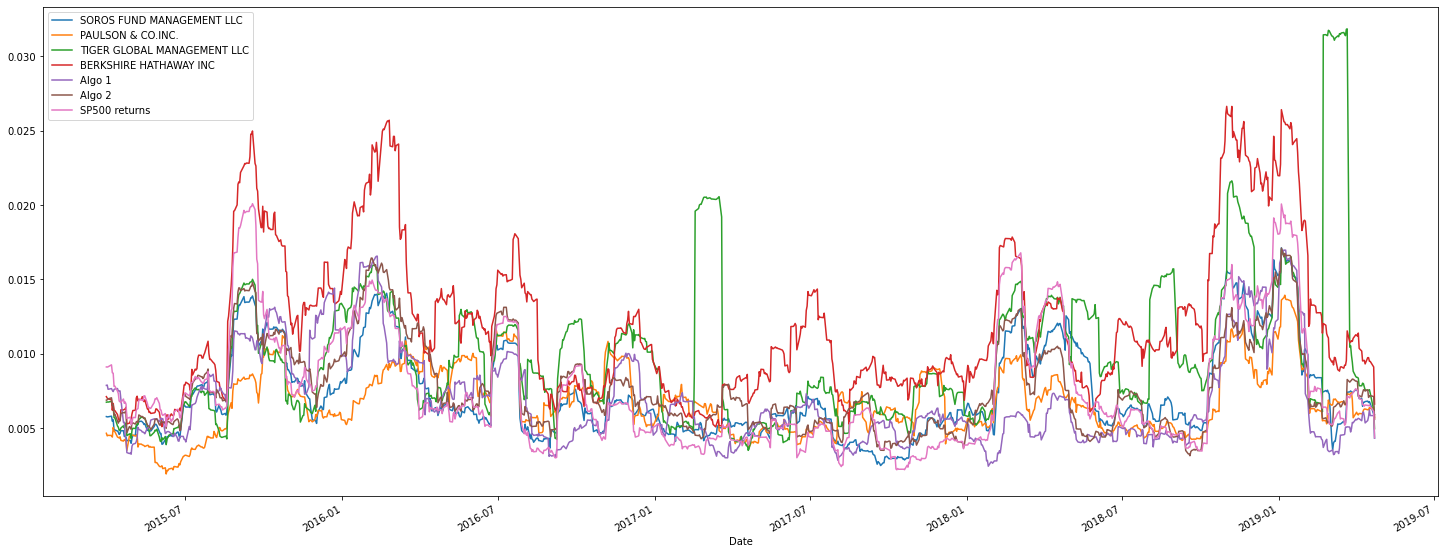

In [138]:
# Plot the rolling standard deviation
combined_21day_std.plot(figsize=(25,10))

### Calculate and plot the correlation

<AxesSubplot:>

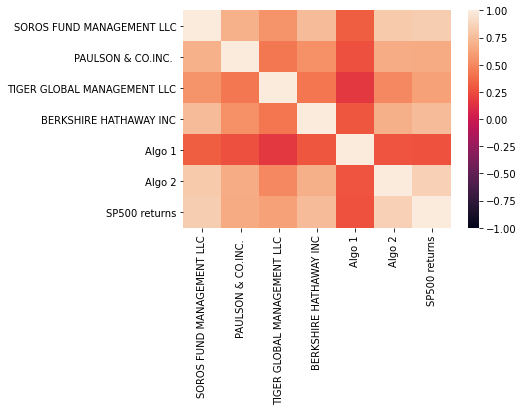

In [139]:
# Calculate the correlation
correlation=combined_returns.corr()
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation,vmin=-1,vmax=1)

In [140]:
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [141]:
# Based on heat map, we can see the funds which mimick the SP500 returns are Soros Fund (corr of 0.83), Algo 2(corr of 0.82) followed by Berkshire Hathway (corr of 0.75).

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Tiger Global Management LLC'}, xlabel='Date'>

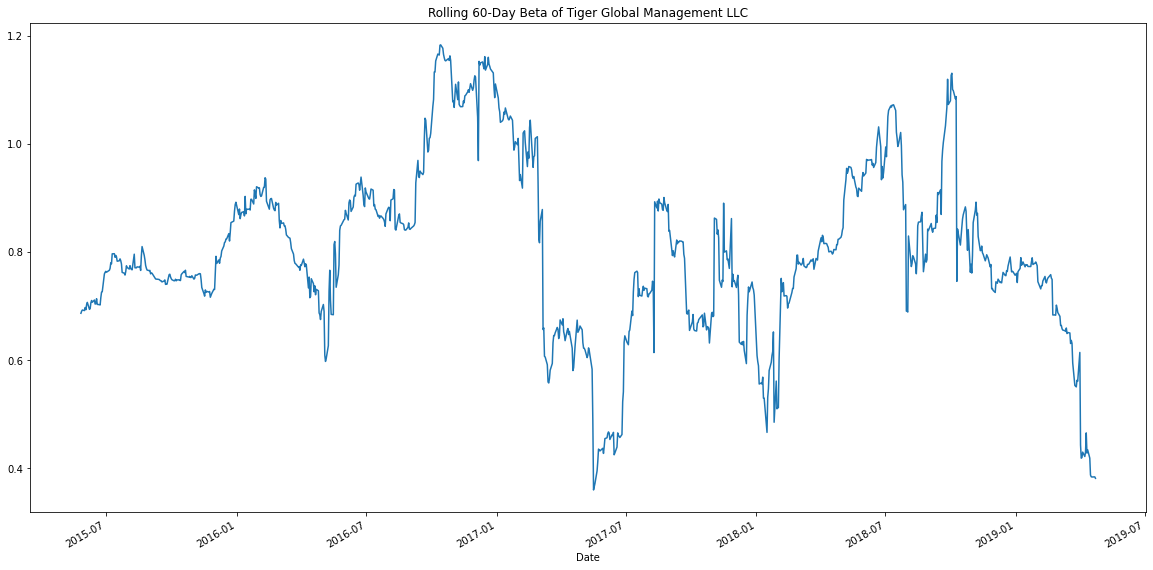

In [142]:
# Calculate covariance of a single portfolio. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500 
#Covariance of Tiger Global Management LLC
Tiger_covariance_60day=combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60). cov(combined_returns['SP500 returns'])


# Calculate variance of S&P 500
sp500_variance_60day=combined_returns['SP500 returns'].rolling(window=60).var()

# Computing beta
Tiger_beta_60day=Tiger_covariance_60day/sp500_variance_60day

# Plot beta trend
Tiger_beta_60day.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Tiger Global Management LLC')



## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [143]:
# Use `ewm` to calculate the rolling window
tiger_ewm=combined_returns['TIGER GLOBAL MANAGEMENT LLC'].ewm(halflife=21).mean()
tiger_ewm


Date
2015-03-03   -0.000496
2015-03-04   -0.001532
2015-03-05   -0.000193
2015-03-06   -0.002369
2015-03-09   -0.000616
                ...   
2019-04-16   -0.000813
2019-04-17   -0.000930
2019-04-18   -0.000881
2019-04-22   -0.000971
2019-04-23   -0.000729
Name: TIGER GLOBAL MANAGEMENT LLC, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [144]:
# Annualized Sharpe Ratios
sharpe_ratios_combined = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios_combined



SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 returns                  0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe ratios'}>

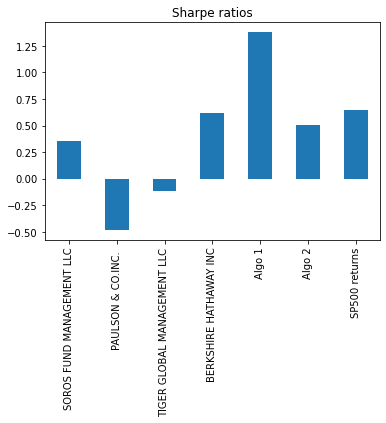

In [145]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_combined.plot(kind='bar',title='Sharpe ratios')

In [146]:
sharpe_ratios_combined.sort_values(ascending=False)

Algo 1                         1.378648
SP500 returns                  0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [147]:
# *Based on the sharpe ratios and bar plot, we can observe that Algo 1 (sharpe ratio of 1.37) outperforms the whale portfolios and SP 500. Berkshire Hathway which is part of the Whale portfolio has the second best risk adjusted return with sharpe ratio of 0.62.* 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [148]:
# Reading data from 1st stock
goog_path=Path("goog_historical.csv")
goog=pd.read_csv(goog_path,index_col='Trade DATE', infer_datetime_format=True,parse_dates=True)
goog.sort_index(inplace=True)
goog.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [149]:
# Reading data from 2nd stock
aapl_path=Path("aapl_historical.csv")
aapl=pd.read_csv(aapl_path,index_col='Trade DATE', infer_datetime_format=True,parse_dates=True)
aapl.sort_index(inplace=True)
aapl.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [150]:
# Reading data from 3rd stock
cost_path=Path("cost_historical.csv")
cost=pd.read_csv(cost_path,index_col='Trade DATE', infer_datetime_format=True,parse_dates=True)
cost.sort_index(inplace=True)
cost.head()


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [151]:
# Combine all stocks in a single DataFrame
my_portfolio=pd.concat([goog,aapl,cost],axis='rows',join='inner')

# Reset Date index
my_portfolio=my_portfolio.reset_index()

# Reorganize portfolio data by having a column per symbol
my_portfolio=my_portfolio.pivot_table(values='NOCP', index="Trade DATE", columns="Symbol")
my_portfolio


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59
...,...,...,...
2019-05-03,211.75,244.62,1185.40
2019-05-06,208.48,244.23,1189.39
2019-05-07,202.86,240.18,1174.10


In [152]:
# Calculate daily returns
my_portfolio_daily_returns=my_portfolio.pct_change()

# Drop NAs
my_portfolio_daily_returns.dropna(inplace=True)

# Display sample data
my_portfolio_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [153]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = my_portfolio_daily_returns.dot(weights)
portfolio_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [154]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_returns=pd.concat([combined_returns,portfolio_returns],axis='columns',join='inner')
 
cmap = {'SOROS FUND MANAGEMENT LLC': 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.': 'PAULSON & CO.INC.', 'TIGER GLOBAL MANAGEMENT LLC': 'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC': 'BERKSHIRE HATHAWAY INC', 'Algo 1': 'ALGO 1','Algo 2':'ALGO 2', 'SP500 returns':'SP500',0:'MY PORTFOLIO'}

all_portfolios_returns = all_portfolios_returns.rename(columns=cmap)



In [155]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_returns.dropna(inplace=True)
all_portfolios_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500,MY PORTFOLIO
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [156]:
# Calculate the annualized `std`
all_portfolios_std=all_portfolios_returns.std()*np.sqrt(252)

all_portfolios_std.sort_values(inplace=True)

all_portfolios_std

PAULSON & CO.INC.              0.116732
ALGO 1                         0.133704
ALGO 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
SP500                          0.152054
MY PORTFOLIO                   0.211496
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

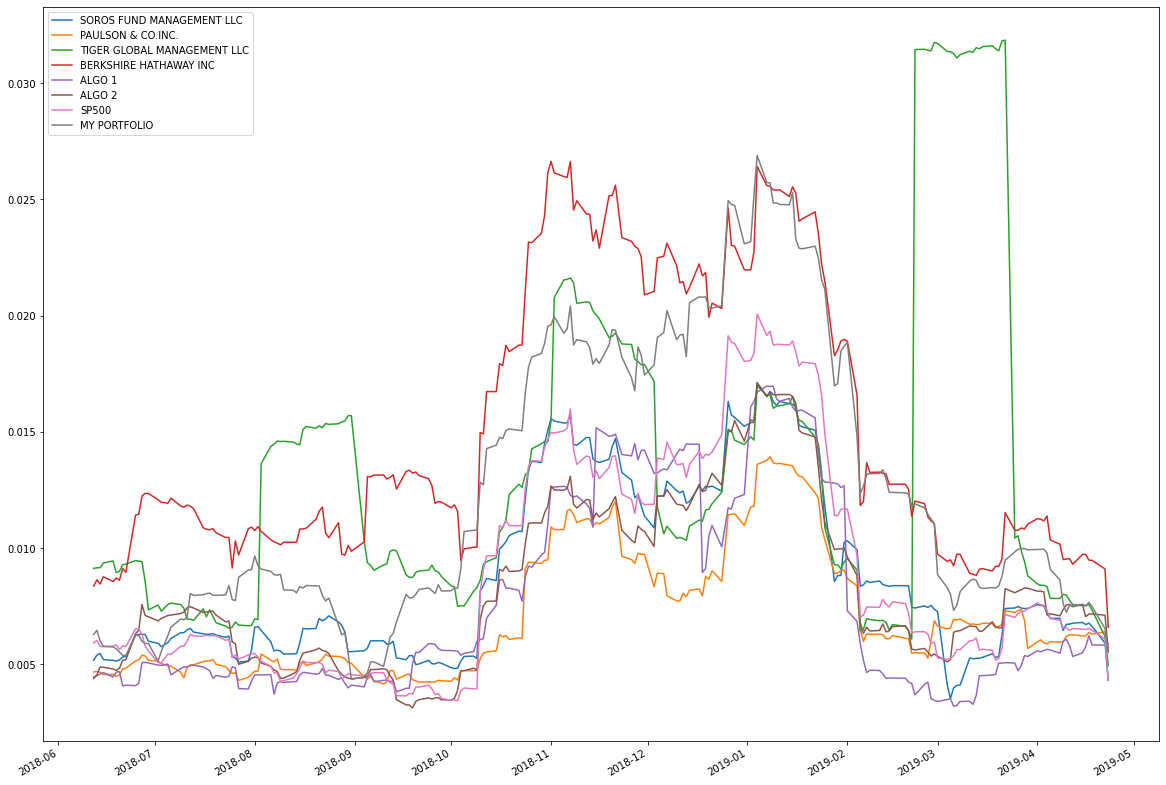

In [157]:
# Calculate rolling standard deviation
all_21_roll_std=all_portfolios_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_21_roll_std.plot(figsize=(20,15))

### Calculate and plot the correlation

In [158]:
# Calculate and plot the correlation
# Calculate the correlation
correlation_all=all_portfolios_returns.corr()
correlation_all


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,ALGO 1,ALGO 2,SP500,MY PORTFOLIO
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
ALGO 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
ALGO 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
MY PORTFOLIO,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


<AxesSubplot:>

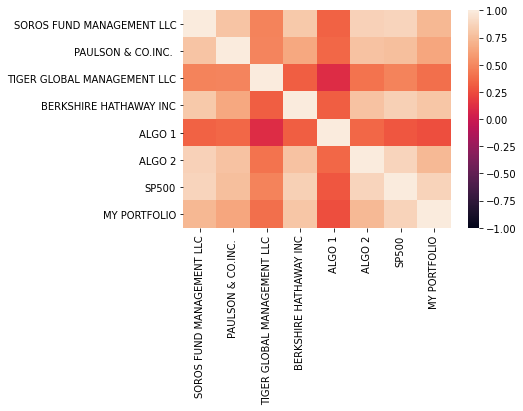

In [159]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation_all,vmin=-1,vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60 day Beta of My Portfolio'}>

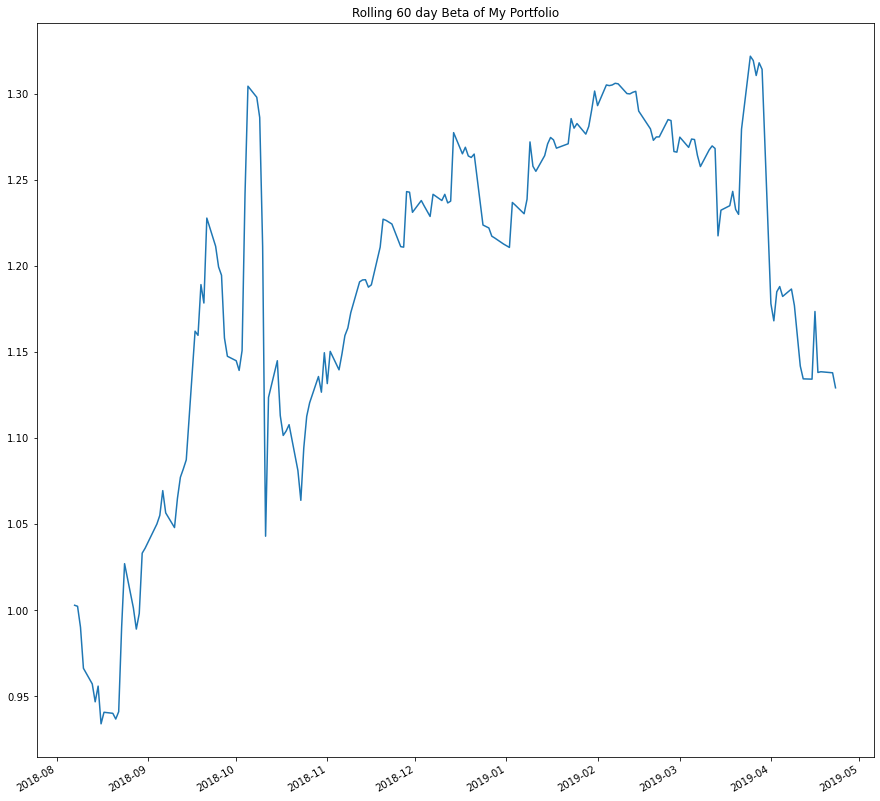

In [160]:
# Calculate and plot Beta
myport_covariance_60day = all_portfolios_returns['MY PORTFOLIO'].rolling(window=60).cov(all_portfolios_returns['SP500'])
 
sp500_variance_60day = all_portfolios_returns['SP500'].rolling(window=60).var()

myport_beta_60day = myport_covariance_60day/sp500_variance_60day
myport_beta_60day.plot(figsize=(15,15),title = 'Rolling 60 day Beta of My Portfolio')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [161]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_all = (all_portfolios_returns.mean() * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios_all.sort_values(ascending=False)

ALGO 1                         2.035665
MY PORTFOLIO                   0.933123
SP500                          0.584820
SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
BERKSHIRE HATHAWAY INC         0.159756
ALGO 2                         0.080607
TIGER GLOBAL MANAGEMENT LLC   -1.034216
dtype: float64

<AxesSubplot:>

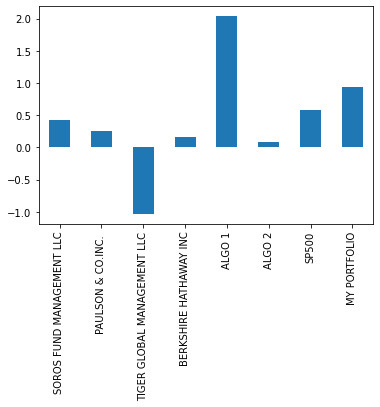

In [162]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_all.plot(kind='bar')



### How does your portfolio do?

Write your answer here!

In [163]:
# My Portfolio is the second best performer with sharpe ratio of 0.93 and has better risk adjusted returns compared to the Whale portfolio. However, it can't beat the Algo 1 portfolio which has the best risk adjusted sharpe ratio of 2.03.